In [2]:
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('NSE-BSE.csv', usecols=[5], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

,Close
0,683.10
1,697.15
2,711.60
3,718.15
4,721.90


In [6]:
dataset.shape

(407, 1)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.        ],
       [0.03133023],
       [0.06355226],
       [0.07815826],
       [0.08652043],
       [0.07648587],
       [0.1182965 ],
       [0.16668522],
       [0.21317887],
       [0.10614347],
       [0.10714698],
       [0.11205268],
       [0.115955  ],
       [0.11751592],
       [0.12186432],
       [0.10469401],
       [0.12186432],
       [0.14059556],
       [0.12643552],
       [0.11495161],
       [0.11996889],
       [0.13959205],
       [0.14884603],
       [0.14360583],
       [0.12442875],
       [0.13457477],
       [0.14315987],
       [0.16924965],
       [0.16791177],
       [0.19801545],
       [0.21050286],
       [0.23269045],
       [0.2504182 ],
       [0.24696171],
       [0.25699627],
       [0.28319764],
       [0.31263244],
       [0.26792288],
       [0.25822294],
       [0.2454009 ],
       [0.25655043],
       [0.2691493 ],
       [0.28230584],
       [0.29200578],
       [0.33805335],
       [0.33102918],
       [0.32422793],
       [0.312

In [6]:
dataset

array([[0.        ],
       [0.03133023],
       [0.06355226],
       [0.07815826],
       [0.08652043],
       [0.07648587],
       [0.1182965 ],
       [0.16668522],
       [0.21317887],
       [0.10614347],
       [0.10714698],
       [0.11205268],
       [0.115955  ],
       [0.11751592],
       [0.12186432],
       [0.10469401],
       [0.12186432],
       [0.14059556],
       [0.12643552],
       [0.11495161],
       [0.11996889],
       [0.13959205],
       [0.14884603],
       [0.14360583],
       [0.12442875],
       [0.13457477],
       [0.14315987],
       [0.16924965],
       [0.16791177],
       [0.19801545],
       [0.21050286],
       [0.23269045],
       [0.2504182 ],
       [0.24696171],
       [0.25699627],
       [0.28319764],
       [0.31263244],
       [0.26792288],
       [0.25822294],
       [0.2454009 ],
       [0.25655043],
       [0.2691493 ],
       [0.28230584],
       [0.29200578],
       [0.33805335],
       [0.33102918],
       [0.32422793],
       [0.312

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

272 135


In [31]:
test

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.633

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [33]:
dataX

NameError: name 'dataX' is not defined

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
testX.shape

(133, 1)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
trainX.shape

(270, 1, 1)

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0757
Epoch 2/100
 - 0s - loss: 0.0189
Epoch 3/100
 - 0s - loss: 0.0139
Epoch 4/100
 - 0s - loss: 0.0095
Epoch 5/100
 - 0s - loss: 0.0056
Epoch 6/100
 - 0s - loss: 0.0027
Epoch 7/100
 - 0s - loss: 0.0012
Epoch 8/100
 - 1s - loss: 6.6078e-04
Epoch 9/100
 - 1s - loss: 5.1047e-04
Epoch 10/100
 - 0s - loss: 4.9397e-04
Epoch 11/100
 - 0s - loss: 4.8518e-04
Epoch 12/100
 - 0s - loss: 4.8960e-04
Epoch 13/100
 - 0s - loss: 4.9361e-04
Epoch 14/100
 - 0s - loss: 4.8688e-04
Epoch 15/100
 - 0s - loss: 5.0584e-04
Epoch 16/100
 - 0s - loss: 5.0702e-04
Epoch 17/100
 - 0s - loss: 5.0047e-04
Epoch 18/100
 - 0s - loss: 4.9847e-04
Epoch 19/100
 - 0s - loss: 4.8740e-04
Epoch 20/100
 - 0s - loss: 4.8954e-04
Epoch 21/100
 - 0s - loss: 5.0906e-04
Epoch 22/100
 - 0s - loss: 4.9127e-04
Epoch 23/100
 - 0s - loss: 4.9922e-04
Epoch 24/100
 - 0s - loss: 4.9627e-04
Epoch 25/100
 - 1s - loss: 4.8391e-04
Epoch 26/100
 - 1s - loss: 4.8179e-04
Epoch 27/100
 - 1s - loss: 4.9080e-04
Epoch 28/10

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.64 RMSE
Test Score: 15.42 RMSE


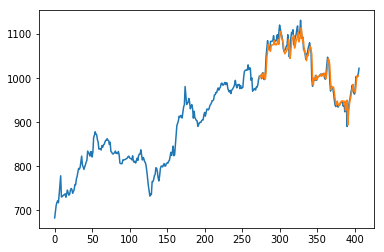

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions


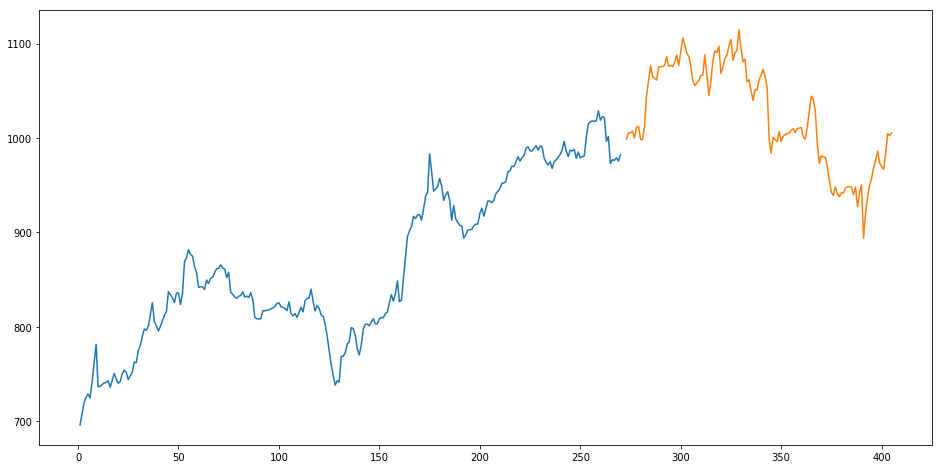

In [22]:
plt.figure(figsize=(16,8))

#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()